In [2]:
import pandas as pd
import numpy as np
import sys
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
import pickle



In [3]:
##setup google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
##setup path
root_path = '/content/drive/MyDrive/W210 - Capstone Project/data'

In [5]:
##import dataset
df_broadband_tr = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/train_3.csv', encoding = 'ISO-8859-1')
df_broadband_test = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/test_3.csv', encoding = 'ISO-8859-1')


## Machine Learning Model for Broadband training dataset



In [6]:
df_broadband_tr = df_broadband_tr.set_index('tract_geoid')
df_broadband_test = df_broadband_test.set_index('tract_geoid')

In [7]:
df_broadband_tr.head()

,Unnamed: 0,All_Provider_Count,MaxAdDown,MaxAdUp,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,...,log_median_income,log_median_house_value,median_income_over_median_rent,median_income_over_median_house_value,pct_of_internet_users_with_broadband,log_median_income_over_log_median_house,pct_desktop_or_laptop,pct_smartphone,pct_only_smartphone,pct_tablet
tract_geoid,,,,,,,,,,,,,,,,,,,,,
6099000201,0,11,1000.0,1000.0,4.0,4,4.0,7.0,3.0,3.0,...,11.172546,12.667918,59.341118,0.224165,100.000000,0.881956,68.284076,80.811645,14.292016,54.741950
47125102002,1,7,1000.0,1000.0,3.0,4,0.0,5.0,4.0,0.0,...,11.113224,12.048249,51.697764,0.392576,99.164439,0.922393,96.990074,93.948127,1.953250,79.090618
22019001300,2,8,1000.0,1000.0,3.0,4,2.0,4.0,2.0,0.0,...,11.162147,12.062779,66.303202,0.406313,100.000000,0.925338,84.889780,85.611222,6.012024,68.777555
18083955400,3,11,1000.0,1000.0,5.0,4,3.0,6.0,3.0,1.0,...,10.388995,11.202316,50.940439,0.443383,100.000000,0.927397,65.481172,75.418410,10.564854,52.301255
39085206600,4,7,1000.0,1000.0,3.0,4,0.0,4.0,2.0,0.0,...,10.900178,11.663928,51.507605,0.465916,98.464164,0.934520,74.532020,67.980296,2.463054,52.216749


In [8]:
df_broadband_tr.shape


(55826, 203)

In [9]:
df_broadband_test.shape

(13947, 203)

In [10]:
df_broadband_tr.describe()

,Unnamed: 0,All_Provider_Count,MaxAdDown,MaxAdUp,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,...,log_median_income,log_median_house_value,median_income_over_median_rent,median_income_over_median_house_value,pct_of_internet_users_with_broadband,log_median_income_over_log_median_house,pct_desktop_or_laptop,pct_smartphone,pct_only_smartphone,pct_tablet
count,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,...,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000
mean,27912.500000,10.656719,957.897019,629.729030,5.527424,3.996417,1.333554,5.085337,2.999893,0.655573,...,10.999802,12.221700,60.508040,0.332359,99.516694,0.901661,75.911962,78.749925,7.615102,57.937991
std,16115.722401,3.058830,152.595259,438.285021,2.677041,0.068151,1.444999,1.390270,1.188782,0.929290,...,0.461022,0.740413,21.704515,0.165234,0.890079,0.037318,14.286054,9.791230,6.136955,12.524106
min,0.000000,3.000000,2.000000,0.512000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,8.325791,9.210240,5.894772,0.014433,72.222222,0.685061,2.603369,10.483871,0.000000,6.317411
25%,13956.250000,8.000000,987.000000,50.000000,4.000000,4.000000,0.000000,4.000000,2.000000,0.000000,...,10.702435,11.704372,45.899438,0.222456,99.256813,0.880425,67.133688,72.638049,2.963984,49.611084
50%,27912.500000,10.000000,1000.000000,940.000000,5.000000,4.000000,1.000000,5.000000,3.000000,0.000000,...,10.993580,12.161598,57.336393,0.321160,100.000000,0.906645,77.999462,79.719145,6.208054,58.320951
75%,41868.750000,12.000000,1000.000000,1000.000000,7.000000,4.000000,2.000000,6.000000,4.000000,1.000000,...,11.302621,12.718597,71.797508,0.417278,100.000000,0.926328,87.088051,86.081764,10.781179,67.021646
max,55825.000000,38.000000,1000.000000,1000.000000,29.000000,5.000000,17.000000,16.000000,11.000000,8.000000,...,12.429220,14.508658,707.617647,5.813081,100.000000,1.191104,100.000000,100.000000,45.263560,92.727273


In [11]:
df_broadband_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55826 entries, 6099000201 to 26125131800
Columns: 203 entries, Unnamed: 0 to pct_tablet
dtypes: float64(130), int64(72), object(1)
memory usage: 86.9+ MB


### Broadband Variables exploration

In [12]:
broadband_vars = ['MaxAdDown',
                 'MaxAdUp',
                 'Wired_Provider_Count',
                 'Satellite_Provider_Count',
                 'Fixed_Wireless_Provider_Count',
                 'All_Provider_Count_25',
                 'All_Provider_Count_100',
                 'Fixed_Wireless_Provider_Count_25',
                 'Wired_Provider_Count_25',
                 'Satellite_Provider_Count_25',
                 'Fixed_Wireless_Provider_Count_100',
                 'Wired_Provider_Count_100',
                 'Satellite_Provider_Count_100',
                 'pct_internet',
                 'pct_internet_dial_up',
                 'pct_internet_broadband_any_type',
                 'pct_internet_cellular',
                 'pct_only_cellular',
                 'pct_internet_broadband_fiber',
                 'pct_internet_broadband_satellite',
                 'pct_internet_only_satellite',
                 'pct_internet_other',
                 'pct_internet_no_subscrp',
                 'pct_internet_none',
                 'pct_computer',
                 'pct_computer_with_dialup',
                 'pct_computer_with_broadband',
                 'pct_computer_no_internet',
                 'pct_no_computer',
                 'Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 'Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps)',
                 'Ookla Median Download Speed (Mbps)',
                 'Ookla Median Upload Speed (Mbps)',
                 '0_5_providers',
                 '6_10_providers',
                 '11_15_providers',
                 '16_20_providers',
                 '20+_providers',
                 '0_25_MaxAdDown',
                 '25_99_MaxAdDown',
                 '99_499_MaxAdDown',
                 '499_inf_MaxAdDown',
                 '0_25_Ookla Median Download Speed (Mbps)',
                 '25_99_Ookla Median Download Speed (Mbps)',
                 '99_499_Ookla Median Download Speed (Mbps)',
                 '499_inf_Ookla Median Download Speed (Mbps)',
                 '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 'single_provider',
                 'SE',
                 'INFA',
                 'DDI',
                 'ruca_metro',
                 'ruca_micro',
                 'ruca_small_town',
                 'ruca_rural',
                 'Comcast_present',
                 'ATT_present',
                 'HughesNet_present',
                 'GCI_Comm_Corp_present',
                 'ViaSat_present',
                 'VSAT_present',
                 'Century_Link_present',
                 'Spectrum_present',
                 'Crown_Castle_present',
                 'Etheric_present',
                 'Frontier_Communications_present']

In [13]:
## get a list of numerical feature
numeric_feats = df_broadband_tr.dtypes[df_broadband_tr.dtypes == "float64"].index.values.tolist()
numeric_feats

['MaxAdDown',
 'MaxAdUp',
 'Wired_Provider_Count',
 'Fixed_Wireless_Provider_Count',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Fixed_Wireless_Provider_Count_25',
 'Wired_Provider_Count_25',
 'Satellite_Provider_Count_25',
 'Fixed_Wireless_Provider_Count_100',
 'Wired_Provider_Count_100',
 'Satellite_Provider_Count_100',
 'median_age_overall',
 'median_age_male',
 'median_age_female',
 'state',
 'county',
 'tract',
 'employment_rate',
 'median_income',
 'total_households',
 'ave_household_size',
 'ave_family_size',
 'pct_health_ins_children',
 'pct_health_ins_19_64',
 'pct_health_ins_65+',
 'total_population',
 'median_house_value',
 'pct_white',
 'pct_hisp_latino',
 'pct_black',
 'pct_native',
 'pct_asian',
 'pct_hi_pi',
 'pct_other_race',
 'pct_two+_race',
 'pct_rent_burdened',
 'poverty_rate',
 'pct_pop_bachelors+',
 'pct_pop_hs+',
 'pct_internet',
 'pct_internet_dial_up',
 'pct_internet_broadband_any_type',
 'pct_internet_cellular',
 'pct_only_cellular',
 'pct_internet_

In [14]:
other_feats = df_broadband_tr.dtypes[df_broadband_tr.dtypes != "float64"].index.values.tolist()
other_feats

['Unnamed: 0',
 'All_Provider_Count',
 'Satellite_Provider_Count',
 'NAME',
 'ALAND',
 'AWATER',
 '0_5_providers',
 '6_10_providers',
 '11_15_providers',
 '16_20_providers',
 '20+_providers',
 '0_25_MaxAdDown',
 '25_99_MaxAdDown',
 '99_499_MaxAdDown',
 '499_inf_MaxAdDown',
 '0_25_Ookla Median Download Speed (Mbps)',
 '25_99_Ookla Median Download Speed (Mbps)',
 '99_499_Ookla Median Download Speed (Mbps)',
 '499_inf_Ookla Median Download Speed (Mbps)',
 '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 'single_provider',
 'Primary RUCA Code - 1.0',
 'Primary RUCA Code - 2.0',
 'Primary RUCA Code - 4.0',
 'Primary RUCA Code - 10.0',
 'Primary RUCA Code - 7.0',
 'Primary RUC

### Train test split
linear regression on target variable = pct of high school degree + 

In [15]:
##drop some variables that are not numerical, highly correlated to dependent varible (bachelors degree)

to_drop = ['pct_pop_hs+','pct_pop_bachelors+', 'NAME','DDI','INFA','SE','pct_pop_some_college','pct_internet_none'	]
target = ['pct_pop_hs+']

X = df_broadband_tr.drop(to_drop, axis = 'columns', inplace=False)
y = df_broadband_tr[target]

##split into train and test 80/20 random split
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [17]:
X_train_all.shape

(44660, 195)

### Broadband Variables Set 1&2

In [18]:
br_important_vars = ['pct_internet',
'pct_only_cellular',
'pct_computing_device_no_internet',
'pct_internet_broadband_satellite',
'pct_computing_device_with_broadband']


In [19]:
br_interest_vars = ['pct_internet',
  'All_Provider_Count_25',
  'All_Provider_Count_100',
  'Ookla Median Download Speed (Mbps)',
  'pct_computing_device',
  'pct_internet_broadband_any_type']


In [20]:
important_cov = ['log_median_income', 
                 'pct_hisp_latino',
                 'ruca_metro',
                 'ruca_micro',
                 'ruca_small_town',
                 'ruca_rural',
                 'log_median_income_over_log_median_house',
                 'pct_pop_foreign_born',
                 'pct_pop_disability']

In [21]:
def regression_results(y_test, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mae=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    r2=metrics.r2_score(y_test, y_pred)
    adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )


    print("The model performance for testing set")
    print("--------------------------------------")
    print('MAE is {}'.format(mae))
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(mse**(1/2.0)))
    print('R2 score is {}'.format(r2))
    print('Adj R2 score is {}'.format(adj_r2))

### Baseline Model - log(median income)

In [22]:
#limit the dataset to only log(median income)

ind_var = ['log_median_income']
target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]


In [23]:
## linear regression model using sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
## predict on x test 
y_pred = lr.predict(X_test)

In [24]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 8.94802099331186
MSE is 132.4111115283205
RMSE is 11.507002716968502
R2 score is 0.4630529011595057
Adj R2 score is 0.4535082626659873


### LR 1: Include all variables (except the ones dropped earlier)

In [25]:
## linear regression model using sklearn
lr = LinearRegression()
lr.fit(X_train_all, y_train_all)
## predict on x test 
y_pred = lr.predict(X_test_all)

In [26]:
## look at coeffcients
pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":lr.coef_[0]})

,Feature,Coefficients
0,Unnamed: 0,-8.427085e-07
1,All_Provider_Count,4.185857e-01
2,MaxAdDown,2.599617e-03
3,MaxAdUp,-1.698877e-05
4,Wired_Provider_Count,-6.208141e-01
...,...,...
190,log_median_income_over_log_median_house,-3.694351e+00
191,pct_desktop_or_laptop,4.121476e-01
192,pct_smartphone,1.490142e-01
193,pct_only_smartphone,5.149481e-02


In [27]:
lr.score(X_test_all,y_test_all)

0.850354647803836

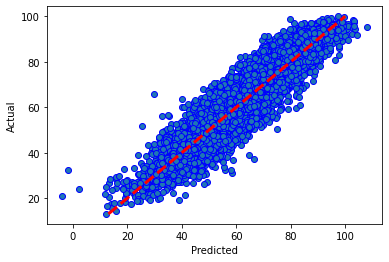

In [28]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test_all, edgecolors=(0, 0, 1))
ax.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


#### LR 1: Model evaluation metrics

In [29]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.775841737252161
MSE is 36.902531854869444
RMSE is 6.07474541481941
R2 score is 0.850354647803836
Adj R2 score is 0.8476945891276051


### LR 2: Model with high correlation variables (corr > |0.5|)

In [30]:
corr = df_broadband_tr.corr()
edu_corr = corr['pct_pop_hs+']

In [31]:
## find variables with |correlation| > 0.5 
high_corr =edu_corr[abs(edu_corr)>0.5]
high_corr.sort_values(ascending=False)

pct_pop_hs+                            1.000000
pct_pop_bachelors+                     0.888712
pct_desktop_or_laptop                  0.776303
pct_pop_income_gt_100k                 0.710661
pct_tablet                             0.698570
pct_computing_device_with_broadband    0.689616
log_median_income                      0.684769
pct_internet_broadband_any_type        0.683735
pct_internet                           0.683164
median_income                          0.676618
pct_internet_cellular                  0.639092
pct_computing_device                   0.638943
pct_pop_gt_200k                        0.636543
pct_pop_150k_thru_200k                 0.608908
log_median_house_value                 0.578137
pct_smartphone                         0.577029
pct_health_ins_19_64                   0.572022
median_rent                            0.512943
pct_pop_125k_thru_150k                 0.503278
pct_computing_device_no_internet      -0.521311
poverty_rate                          -0

In [32]:
#combine both positively and negatively correlated variables with corr >0.5
var_high_corr = high_corr.index.tolist()
print(var_high_corr)

['median_income', 'pct_health_ins_19_64', 'poverty_rate', 'pct_pop_bachelors+', 'pct_pop_hs+', 'pct_internet', 'pct_internet_broadband_any_type', 'pct_internet_cellular', 'pct_internet_none', 'pct_computing_device', 'pct_computing_device_with_broadband', 'pct_computing_device_no_internet', 'pct_no_computing_device', 'pct_pop_ssi_households', 'pct_pop_125k_thru_150k', 'pct_pop_150k_thru_200k', 'pct_pop_gt_200k', 'SE', 'INFA', 'DDI', 'pct_pop_income_lt_50k', 'pct_pop_income_lt_30k', 'pct_pop_income_gt_100k', 'median_rent', 'log_median_income', 'log_median_house_value', 'pct_desktop_or_laptop', 'pct_smartphone', 'pct_only_smartphone', 'pct_tablet']


In [33]:
#limit the dataset to only the relevant variables

ind_var = [e for e in var_high_corr if e not in to_drop]

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [34]:
lr_2 = LinearRegression()
lr_2.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = lr_2.predict(X_test)

y_pred

array([[54.92531191],
       [51.71708133],
       [60.69185313],
       ...,
       [52.68924513],
       [44.19223803],
       [53.30435121]])

In [36]:
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lr_2.coef_[0]})

,Feature,Coefficients
0,median_income,-0.000154
1,pct_health_ins_19_64,0.278909
2,poverty_rate,-0.075842
3,pct_internet,0.171341
4,pct_internet_broadband_any_type,-0.264481
5,pct_internet_cellular,0.150283
6,pct_computing_device,-0.408473
7,pct_computing_device_with_broadband,0.649400
8,pct_computing_device_no_internet,0.673379
9,pct_no_computing_device,0.408473


#### LR 2: Model evaluation metrics

In [37]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 6.652276038003812
MSE is 71.14360096536953
RMSE is 8.434666618507784
R2 score is 0.7115019298720218
Adj R2 score is 0.7063736597102208


we can see that the metrics dropped pretty significantly.

### LR 3: Adding all broadband-related variables in addition to the above high correlation variables

In [38]:
#limit the dataset to only the relevant variables

for word in br_important_vars:
    if word not in ind_var:
        ind_var.append(word)

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [39]:
ind_var

['median_income',
 'pct_health_ins_19_64',
 'poverty_rate',
 'pct_internet',
 'pct_internet_broadband_any_type',
 'pct_internet_cellular',
 'pct_computing_device',
 'pct_computing_device_with_broadband',
 'pct_computing_device_no_internet',
 'pct_no_computing_device',
 'pct_pop_ssi_households',
 'pct_pop_125k_thru_150k',
 'pct_pop_150k_thru_200k',
 'pct_pop_gt_200k',
 'pct_pop_income_lt_50k',
 'pct_pop_income_lt_30k',
 'pct_pop_income_gt_100k',
 'median_rent',
 'log_median_income',
 'log_median_house_value',
 'pct_desktop_or_laptop',
 'pct_smartphone',
 'pct_only_smartphone',
 'pct_tablet',
 'pct_only_cellular',
 'pct_internet_broadband_satellite']

In [40]:
lr_3 = LinearRegression()
lr_3.fit(X_train, y_train)
y_pred = lr_3.predict(X_test)
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lr_3.coef_[0]})

,Feature,Coefficients
0,median_income,-0.000154
1,pct_health_ins_19_64,0.268932
2,poverty_rate,-0.075397
3,pct_internet,0.210841
4,pct_internet_broadband_any_type,-0.332307
5,pct_internet_cellular,0.171590
6,pct_computing_device,-0.341737
7,pct_computing_device_with_broadband,0.559411
8,pct_computing_device_no_internet,0.566274
9,pct_no_computing_device,0.341737


#### LR3: Model evaluation metrics

In [41]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 6.620094885045002
MSE is 70.34384249362928
RMSE is 8.387123612635579
R2 score is 0.7147450715254484
Adj R2 score is 0.7096744506455452


As expected, these newly added boradband variables are not adding much improvement to the model.

### LR 4: Adding interesting broadband vars

In [42]:
#limit the dataset to only the relevant variables

for word in br_interest_vars:
    if word not in ind_var:
        ind_var.append(word)

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [43]:
lr_4 = LinearRegression()
lr_4.fit(X_train, y_train)
y_pred = lr_4.predict(X_test)
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lr_4.coef_[0]})

,Feature,Coefficients
0,median_income,-0.000153
1,pct_health_ins_19_64,0.260819
2,poverty_rate,-0.078104
3,pct_internet,0.131695
4,pct_internet_broadband_any_type,-0.187035
5,pct_internet_cellular,0.165848
6,pct_computing_device,-0.356044
7,pct_computing_device_with_broadband,0.547555
8,pct_computing_device_no_internet,0.593027
9,pct_no_computing_device,0.356044


In [44]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 6.5713698591163885
MSE is 69.34203517345486
RMSE is 8.327186510067783
R2 score is 0.7188075518411565
Adj R2 score is 0.7138091446040576


### Use Cross-Validation to evaluate model performance

In [45]:
from sklearn.utils import shuffle
X_shuffle, y_shuffle = shuffle(X_train, y_train, random_state=42)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_4, X_shuffle, y_shuffle,
                         scoring="neg_mean_squared_error",
                         cv=5, n_jobs=1)
rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 2))
print("RMSE average: ", np.mean(rmse))


RMSE values:  [8.4  8.36 8.37 8.42 8.4 ]
RMSE average:  8.390106210680138


## Random Forest

### RF 1: Include all variables

In [46]:
# Fitting Random Forest Regression to the dataset

# create regressor object
rf_rg = RandomForestRegressor(n_estimators = 500, random_state = 0)

# fit the regressor with x and y data
rf_rg.fit(X_train_all, y_train_all)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(n_estimators=500, random_state=0)

In [47]:
y_pred = rf_rg.predict(X_test_all)
y_pred

array([59.70456877, 49.44986352, 59.61863906, ..., 48.10512905,
       50.18799825, 57.07322942])

In [48]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.637920516969223
MSE is 35.02499505543372
RMSE is 5.91819187382715
R2 score is 0.8579683437073528
Adj R2 score is 0.855443624201695


#### Feature importance

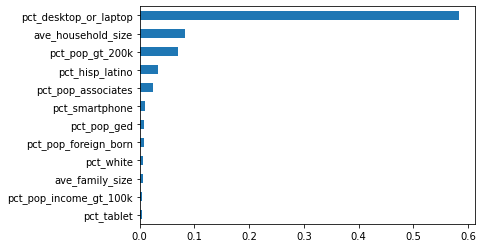

In [49]:
(pd.Series(rf_rg.feature_importances_, index=X_test_all.columns)
   .nlargest(12)[::-1]
   .plot(kind='barh')
   )  
   

In [50]:
top_vars_rf = (pd.Series(rf_rg.feature_importances_, index=X_test_all.columns).nlargest(10)[::-1])
print(top_vars_rf)

ave_family_size          0.005207
pct_white                0.005670
pct_pop_foreign_born     0.007431
pct_pop_ged              0.008325
pct_smartphone           0.009134
pct_pop_associates       0.025082
pct_hisp_latino          0.033182
pct_pop_gt_200k          0.069517
ave_household_size       0.083112
pct_desktop_or_laptop    0.582521
dtype: float64


In [ ]:
# # Calculate feature importances
# importances = rf_rg.feature_importances_

# # Visualize Feature Importance
# # Sort feature importances in descending order
# indices = np.argsort(importances)[::-1]
# top_k = 20
# new_indices = indices[:top_k]

# # Rearrange feature names so they match the sorted feature importances
# names = [X_train.columns[i] for i in new_indices]

# plt.figure(figsize = (12, 5))
# sns.set_style("whitegrid")
# chart = sns.barplot(x = names, y=importances[new_indices])
# plt.xticks(
#     rotation=45, 
#     horizontalalignment='right',
#     fontweight='light'  
# )
# plt.title('Random forest. Feature importance')
# plt.tight_layout()

### RF 2: Only the top 10 features + broadband var set 1

In [51]:
top_vars_rf_list = top_vars_rf.index.tolist()
print(top_vars_rf_list)

['ave_family_size', 'pct_white', 'pct_pop_foreign_born', 'pct_pop_ged', 'pct_smartphone', 'pct_pop_associates', 'pct_hisp_latino', 'pct_pop_gt_200k', 'ave_household_size', 'pct_desktop_or_laptop']


In [52]:
#limit the dataset to only the relevant variables

ind_var = [e for e in top_vars_rf_list if e not in ('pct_pop_hs+','pct_pop_bachelors+')]
for word in br_important_vars:
    if word not in ind_var:
        ind_var.append(word)

for word in important_cov:
    if word not in ind_var:
        ind_var.append(word)

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [53]:
ind_var

['ave_family_size',
 'pct_white',
 'pct_pop_foreign_born',
 'pct_pop_ged',
 'pct_smartphone',
 'pct_pop_associates',
 'pct_hisp_latino',
 'pct_pop_gt_200k',
 'ave_household_size',
 'pct_desktop_or_laptop',
 'pct_internet',
 'pct_only_cellular',
 'pct_computing_device_no_internet',
 'pct_internet_broadband_satellite',
 'pct_computing_device_with_broadband',
 'log_median_income',
 'ruca_metro',
 'ruca_micro',
 'ruca_small_town',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_disability']

In [54]:
# Fitting Random Forest Regression to the dataset

# create regressor object
rf_rg2 = RandomForestRegressor(n_estimators = 500, random_state = 0)

# fit the regressor with x and y data
rf_rg2.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(n_estimators=500, random_state=0)

In [55]:
y_pred = rf_rg2.predict(X_test)
y_pred

array([58.9510957 , 49.15727061, 56.77060983, ..., 49.40747555,
       51.87856732, 55.58661359])

In [56]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.80168264718822
MSE is 37.53396963378951
RMSE is 6.12649733810352
R2 score is 0.847794072036621
Adj R2 score is 0.8450884972004443


In [57]:
top_vars_rf2 = (pd.Series(rf_rg2.feature_importances_, index=X_test.columns).nlargest(25)[:-1])
print(top_vars_rf2)

pct_desktop_or_laptop                      0.592000
ave_household_size                         0.092142
pct_pop_gt_200k                            0.080439
pct_hisp_latino                            0.040678
pct_pop_associates                         0.034645
pct_smartphone                             0.022011
pct_pop_ged                                0.016878
pct_pop_foreign_born                       0.016097
pct_white                                  0.015520
log_median_income                          0.014374
log_median_income_over_log_median_house    0.013148
pct_pop_disability                         0.012128
ave_family_size                            0.011772
pct_internet_broadband_satellite           0.008801
pct_only_cellular                          0.008435
pct_computing_device_no_internet           0.007115
pct_computing_device_with_broadband        0.006394
pct_internet                               0.005943
ruca_metro                                 0.000566
ruca_micro  

In [58]:
pd.DataFrame({'Variables':top_vars_rf2.index, 'Importance':top_vars_rf2.values})


,Variables,Importance
0,pct_desktop_or_laptop,0.592000
1,ave_household_size,0.092142
2,pct_pop_gt_200k,0.080439
3,pct_hisp_latino,0.040678
4,pct_pop_associates,0.034645
5,pct_smartphone,0.022011
6,pct_pop_ged,0.016878
7,pct_pop_foreign_born,0.016097
8,pct_white,0.015520
9,log_median_income,0.014374


### RF 3: Only the top 10 features + broadband var set 2

In [60]:
#limit the dataset to only the relevant variables

ind_var_rf3 = [e for e in top_vars_rf_list if e not in ('pct_pop_hs+','pct_pop_bachelors+')]
for word in br_interest_vars:
    if word not in ind_var_rf3:
        ind_var_rf3.append(word)

for word in important_cov:
    if word not in ind_var_rf3:
        ind_var_rf3.append(word)
        
target = ['pct_pop_hs+']

X_train = X_train_all[ind_var_rf3]
X_test = X_test_all[ind_var_rf3]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [61]:
ind_var_rf3

['ave_family_size',
 'pct_white',
 'pct_pop_foreign_born',
 'pct_pop_ged',
 'pct_smartphone',
 'pct_pop_associates',
 'pct_hisp_latino',
 'pct_pop_gt_200k',
 'ave_household_size',
 'pct_desktop_or_laptop',
 'pct_internet',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Ookla Median Download Speed (Mbps)',
 'pct_computing_device',
 'pct_internet_broadband_any_type',
 'log_median_income',
 'ruca_metro',
 'ruca_micro',
 'ruca_small_town',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_disability']

In [62]:
# Fitting Random Forest Regression to the dataset

# create regressor object
rf_rg3 = RandomForestRegressor(n_estimators = 500, random_state = 0)

# fit the regressor with x and y data
rf_rg3.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(n_estimators=500, random_state=0)

In [63]:
y_pred = rf_rg3.predict(X_test)
y_pred

array([59.53565667, 48.89073149, 56.80846647, ..., 49.15513457,
       51.59975878, 55.56861393])

In [64]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.774831314966001
MSE is 37.10874056306278
RMSE is 6.091694391797965
R2 score is 0.8495184402805998
Adj R2 score is 0.8468435173867727


In [65]:
top_vars_rf3 = (pd.Series(rf_rg3.feature_importances_, index=X_test.columns).nlargest(25)[:-1])
print(top_vars_rf3)


pct_desktop_or_laptop                      0.592039
ave_household_size                         0.092257
pct_pop_gt_200k                            0.080613
pct_hisp_latino                            0.040838
pct_pop_associates                         0.034877
pct_smartphone                             0.021069
pct_pop_ged                                0.017093
pct_pop_foreign_born                       0.016198
pct_white                                  0.015622
log_median_income                          0.014717
log_median_income_over_log_median_house    0.013348
pct_pop_disability                         0.012320
ave_family_size                            0.011943
Ookla Median Download Speed (Mbps)         0.009080
pct_computing_device                       0.008491
pct_internet_broadband_any_type            0.006020
pct_internet                               0.005700
All_Provider_Count_25                      0.003159
All_Provider_Count_100                     0.003151
ruca_metro  

In [66]:
pd.DataFrame({'Variables':top_vars_rf3.index, 'Importance':top_vars_rf3.values})


,Variables,Importance
0,pct_desktop_or_laptop,0.592039
1,ave_household_size,0.092257
2,pct_pop_gt_200k,0.080613
3,pct_hisp_latino,0.040838
4,pct_pop_associates,0.034877
5,pct_smartphone,0.021069
6,pct_pop_ged,0.017093
7,pct_pop_foreign_born,0.016198
8,pct_white,0.015622
9,log_median_income,0.014717


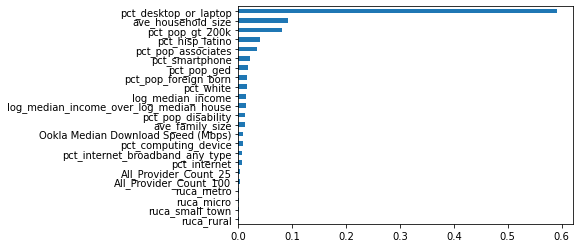

In [67]:
(pd.Series(rf_rg3.feature_importances_, index=X_test.columns)
   .nlargest(30)[::-1]
   .plot(kind='barh')
   )  

#### Hyperparameter Tuning

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_rg3.get_params())

In [ ]:
random_forest_tuning = RandomForestRegressor(random_state = 0)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto'],
    'max_depth' : [2,5,10],
    'criterion' :['squared_error']
}

In [ ]:
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(X_train, y_train)

In [ ]:
GSCV.best_params_

In [ ]:
random_forest_tuned = RandomForestRegressor(criterion= 'squared_error',max_depth= 10,max_features= 'auto',n_estimators =500,random_state = 0)
random_forest_tuned.fit(X_train, y_train)
y_pred = random_forest_tuned.predict(X_test)

In [ ]:
# model evaluation for testing set
regression_results(y_test, y_pred)

## XGBoost

### XGB 1: Include all variables

In [149]:
# The dataset needs to be converted into DMatrix.
# It is an optimized data structure that the creators of XGBoost made. 
# It gives the package its performance and efficiency gains.
dtrain = xgb.DMatrix(X_train_all, label=y_train_all)
dtest = xgb.DMatrix(X_test_all, label=y_test_all)

In [150]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 2500)

In [151]:
## Here we will tune the below hyperparameters that are usually having a big impact on performance
params = {
    # Parameters that we are going to tune.
    'max_depth':3,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 0.3,
    'learning_rate' : 0.05,
    'alpha': 10,
    'n_estimator': 2500,
    # Other parameters
    'objective':'reg:linear',
}

In [152]:
xg_reg.fit(X_train_all,y_train_all)
y_pred = xg_reg.predict(X_test_all)

[16:45:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [153]:
# model evaluation for testing set
regression_results(y_test_all, y_pred)

The model performance for testing set
--------------------------------------
MAE is 3.8905848510088337
MSE is 24.78720068090727
RMSE is 4.978674590782899
R2 score is 0.8994841494768087
Adj R2 score is 0.8976974046407081


#### Feature Importance

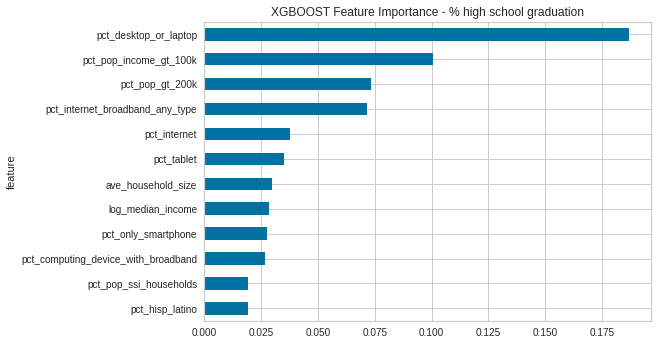

In [154]:
(pd.Series(xg_reg.feature_importances_, index=X_test_all.columns)
   .nlargest(12)[::-1]
   .plot(kind='barh',title="XGBOOST Feature Importance - % high school graduation", xlabel="feature")
   )  


### XGB 2: Only the top 10 features + broadband var set 1

In [155]:
top_vars = (pd.Series(xg_reg.feature_importances_, index=X_test_all.columns).nlargest(12)[:-1])
print(top_vars)

pct_desktop_or_laptop                  0.186994
pct_pop_income_gt_100k                 0.100443
pct_pop_gt_200k                        0.073326
pct_internet_broadband_any_type        0.071688
pct_internet                           0.037615
pct_tablet                             0.035181
ave_household_size                     0.029754
log_median_income                      0.028645
pct_only_smartphone                    0.027536
pct_computing_device_with_broadband    0.026902
pct_pop_ssi_households                 0.019267
dtype: float32


In [156]:
top_vars_list_xg = top_vars.index.tolist()
print(top_vars_list_xg)

['pct_desktop_or_laptop', 'pct_pop_income_gt_100k', 'pct_pop_gt_200k', 'pct_internet_broadband_any_type', 'pct_internet', 'pct_tablet', 'ave_household_size', 'log_median_income', 'pct_only_smartphone', 'pct_computing_device_with_broadband', 'pct_pop_ssi_households']


In [157]:
top_vars_list_xg = ['pct_desktop_or_laptop', 'pct_pop_income_gt_100k', 'pct_pop_gt_200k', 'pct_internet_broadband_any_type', 'pct_internet', 'pct_tablet', 'ave_household_size', 'log_median_income', 'pct_only_smartphone', 'pct_computing_device_with_broadband', 'pct_pop_ssi_households']


In [55]:
#limit the dataset to only the relevant variables

ind_var = [e for e in top_vars_list_xg if e not in to_drop]
for word in br_important_vars:
    if word not in ind_var:
        ind_var.append(word)

for word in important_cov:
    if word not in ind_var:
        ind_var.append(word)

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [56]:
ind_var

['pct_desktop_or_laptop',
 'pct_pop_income_gt_100k',
 'pct_pop_gt_200k',
 'pct_internet_broadband_any_type',
 'pct_internet',
 'pct_tablet',
 'ave_household_size',
 'log_median_income',
 'pct_only_smartphone',
 'pct_computing_device_with_broadband',
 'pct_pop_ssi_households',
 'pct_only_cellular',
 'pct_computing_device_no_internet',
 'pct_internet_broadband_satellite',
 'pct_hisp_latino',
 'ruca_metro',
 'ruca_micro',
 'ruca_small_town',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_foreign_born',
 'pct_pop_disability']

In [57]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

[15:56:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [58]:
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 5.057314652172292
MSE is 41.76464995669816
RMSE is 6.462557539913912
R2 score is 0.8306380229763313
Adj R2 score is 0.8276274864658832


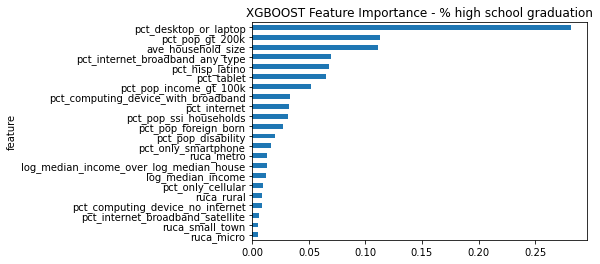

In [59]:
(pd.Series(xg_reg.feature_importances_, index=X_test.columns)
   .nlargest(30)[::-1]
   .plot(kind='barh',title="XGBOOST Feature Importance - % high school graduation", xlabel="feature")
   ) 

In [60]:
top_vars = pd.Series(xg_reg.feature_importances_, index=X_test.columns).nlargest(26)[:-1]
pd.DataFrame({'Variables':top_vars.index, 'Importance':top_vars.values})


,Variables,Importance
0,pct_desktop_or_laptop,0.282109
1,pct_pop_gt_200k,0.113160
2,ave_household_size,0.111361
3,pct_internet_broadband_any_type,0.069083
4,pct_hisp_latino,0.067592
5,pct_tablet,0.065117
6,pct_pop_income_gt_100k,0.052050
7,pct_computing_device_with_broadband,0.033587
8,pct_internet,0.032223
9,pct_pop_ssi_households,0.031584


### XGB3: Only the top 10 features + broadband var set 2

In [189]:
#limit the dataset to only the relevant variables

ind_var = [e for e in top_vars_list_xg if e not in to_drop]
for word in br_interest_vars:
    if word not in ind_var:
        ind_var.append(word)

for word in important_cov:
    if word not in ind_var:
        ind_var.append(word)
        
target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [159]:
ind_var

['pct_desktop_or_laptop',
 'pct_pop_income_gt_100k',
 'pct_pop_gt_200k',
 'pct_internet_broadband_any_type',
 'pct_internet',
 'pct_tablet',
 'ave_household_size',
 'log_median_income',
 'pct_only_smartphone',
 'pct_computing_device_with_broadband',
 'pct_pop_ssi_households',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Ookla Median Download Speed (Mbps)',
 'pct_computing_device',
 'pct_hisp_latino',
 'ruca_metro',
 'ruca_micro',
 'ruca_small_town',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_foreign_born',
 'pct_pop_disability']

In [160]:
ind_var = ['pct_desktop_or_laptop',
 'pct_pop_income_gt_100k',
 'pct_pop_gt_200k',
 'pct_internet_broadband_any_type',
 'pct_internet',
 'pct_tablet',
 'ave_household_size',
 'log_median_income',
 'pct_only_smartphone',
 'pct_computing_device_with_broadband',
 'pct_pop_ssi_households',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Ookla Median Download Speed (Mbps)',
 'pct_computing_device',
 'pct_hisp_latino',
 'ruca_metro',
 'ruca_micro',
 'ruca_small_town',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_foreign_born',
 'pct_pop_disability']

In [64]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

[15:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [65]:
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 5.0050442448137185
MSE is 40.624639993978136
RMSE is 6.373746150732561
R2 score is 0.8352609359257543
Adj R2 score is 0.8323325751696488


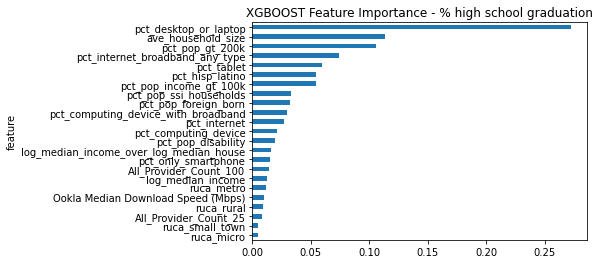

In [66]:
(pd.Series(xg_reg.feature_importances_, index=X_test.columns)
   .nlargest(30)[::-1]
   .plot(kind='barh',title="XGBOOST Feature Importance - % high school graduation", xlabel="feature")
   ) 

In [67]:
top_vars = pd.Series(xg_reg.feature_importances_, index=X_test.columns).nlargest(30)[:-1]
pd.DataFrame({'Variables':top_vars.index, 'Importance':top_vars.values})

,Variables,Importance
0,pct_desktop_or_laptop,0.272641
1,ave_household_size,0.113506
2,pct_pop_gt_200k,0.105943
3,pct_internet_broadband_any_type,0.073951
4,pct_tablet,0.059322
5,pct_hisp_latino,0.054064
6,pct_pop_income_gt_100k,0.053946
7,pct_pop_ssi_households,0.032626
8,pct_pop_foreign_born,0.031900
9,pct_computing_device_with_broadband,0.029381


#### Hyperparameter Tuning

In [ ]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

regressor_tuned = xgb.XGBRegressor()

regress = RandomizedSearchCV(estimator=regressor_tuned, 
                             param_distributions=params,
                             scoring='neg_mean_squared_error', 
                             verbose=10,
                             n_iter = 20,
                             cv = 3,
                             random_state=42)

regress.fit(X_train, y_train)

In [ ]:
print("Best parameters:", regress.best_params_)
print("Lowest RMSE: ", (-regress.best_score_)**(1/2.0))
y_pred = regress.predict(X_test)

regression_results(y_test, y_pred)

In [ ]:
# set evaluation metrics to be rmse
params['eval_metric'] = "rmse"

In [ ]:
num_boost_round = 5000

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))


In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={"rmse"},
    early_stopping_rounds=10
)
cv_results

In [ ]:
# get the min of all aboce
cv_results['test-rmse-mean'].min()


In [ ]:
# tune hyperparamter "max_depth" and "min_child_weight"
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,8)
    for min_child_weight in range(0,5)
]

In [ ]:
# Define initial best params and MAE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

In [ ]:
# update parameters according to the above result
params['max_depth'] = 2
params['min_child_weight'] = 2

In [ ]:
# Parameters subsample and colsample_bytree
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(1,5)]
    for colsample in [i/10. for i in range(1,5)]
]

In [ ]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

In [ ]:
## update parameters
params['subsample'] = 0.4
params['colsample_bytree'] = 0.4

In [ ]:

params = {
    # Parameters that we are going to tune.
    'max_depth':5,
    'min_child_weight': 2,
    'eta':.3,
    'subsample': 1.0,
    'colsample_bytree': 0.3,
    'learning_rate' : 0.1,
    'alpha': 10,
    'n_estimator': 10,
    # Other parameters
    'objective':'reg:linear',
}




In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

In [ ]:
num_boost_round = model.best_iteration + 1
xg_rg = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

In [ ]:

# model evaluation for testing set
mse_xgboost = mean_squared_error(xg_rg.predict(dtest), y_test)
mae_xgboost = mean_absolute_error(xg_rg.predict(dtest), y_test)
r2_xgboost = metrics.r2_score(y_test,xg_rg.predict(dtest))
adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )

# print("RMSE: %f" % (rmse_xgboost)**(1/2))

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_xgboost))
print('MSE is {}'.format(mse_xgboost))
print('RMSE is {}'.format(mse_xgboost**(1/2.0)))
print('R2 score is {}'.format(r2))
print('Adj R2 score is {}'.format(adj_r2))

#Best Model

### So far, best model is XGB with broadband set 2



In [190]:
## using actual test dataset

X_test= df_broadband_test[ind_var]
y_test= df_broadband_test[target]

In [191]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

[17:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [114]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 5.0050442448137185
MSE is 40.624639993978136
RMSE is 6.373746150732561
R2 score is 0.8352609359257543
Adj R2 score is 0.8323325751696488


In [72]:
with open('education_xgb_model.pkl', 'wb') as file:
    pickle.dump(xg_reg, file)

# Error Analysis

In [175]:
## transfer to np array for error analysis

X_train_1 = np.squeeze(np.asarray(X_train))
y_train_1 = np.squeeze(np.asarray(y_train))
X_test_1 = np.squeeze(np.asarray(X_test))
y_test_1 = np.squeeze(np.asarray(y_test))

In [176]:
xg_reg.fit(X_train_1,y_train_1)
y_pred_1 = xg_reg.predict(X_test_1)

[16:59:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [177]:
# model evaluation for testing set
regression_results(y_test_1, y_pred_1)

The model performance for testing set
--------------------------------------
MAE is 5.0050442448137185
MSE is 40.624639993978136
RMSE is 6.373746150732561
R2 score is 0.8352609359257543
Adj R2 score is 0.8323325751696488


In [85]:
## import error analysis library
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import cooks_distance
import scipy.stats as stats

## Residual plot

The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

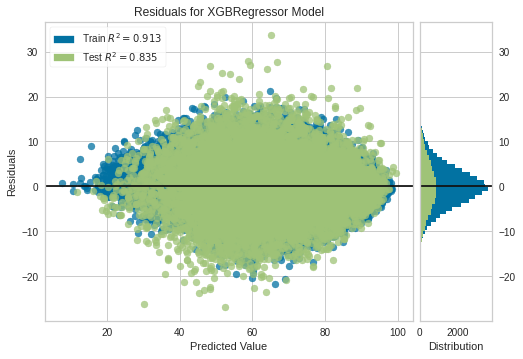

In [182]:
visualizer = ResidualsPlot(xg_reg)

visualizer.fit(X_train_1, y_train_1)  # Fit the training data to the visualizer
visualizer.score(X_test_1, y_test_1)  # Evaluate the model on the test data
visualizer.show()  

### Interpretations

In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our model is performing well. We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.

## Prediction Error Plot

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45 degree line, where the prediction exactly matches the model.


Prediction Error Plot


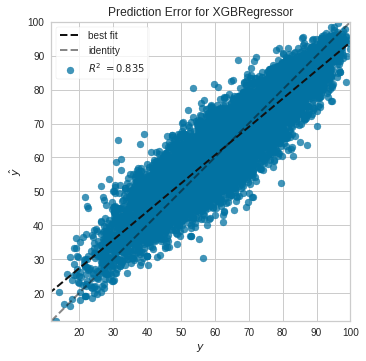

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3432bb8610>,
                estimator=XGBRegressor(alpha=10, colsample_bytree=0.3,
                                       learning_rate=0.05, max_depth=5,
                                       n_estimators=2500))


In [181]:
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xg_reg, X_train_1, y_train_1, X_test_1, y_test_1))


### Interpretations

We can see that most of the points are on a straight line. We can compare this plot against the 45-degree line, where the prediction exactly matches the model. In general, the predictions follow the actualS.

## Cook's distance

Cook’s Distance is a measure of how influential an instance is to the computation of a regression, e.g. if the instance is removed would the estimated coeficients of the underlying model be substantially changed? Because of this, Cook’s Distance is generally used to detect outliers in standard, OLS regression. In fact, a general rule of thumb is that D(i) > 4/n is a good threshold for determining highly influential points as outliers and this visualizer can report the percentage of data that is above that threshold.

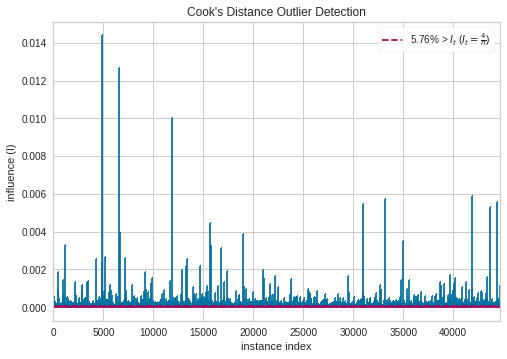

CooksDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3432849550>)

In [184]:
cooks_distance(
    X_train_1, y_train_1,
    draw_threshold=True,
    linefmt="C0-", markerfmt=","
)

In particular, there are several (5.76%）of the observations with Cook’s distance values that are relatively higher than the others.

## Q-Q plot

To check the assumption of the normality of the data generating process, we can use Q-Q plot of the normalized residuals.

Text(0.5, 1.0, 'Normal Q-Q Plot')

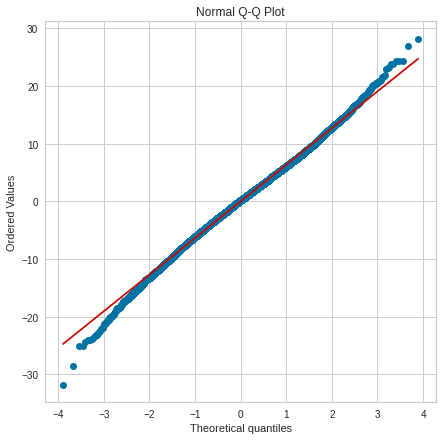

In [192]:
residuals = y_test["pct_pop_hs+"] - y_pred.reshape(-1)
residuals

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

## Interpretations

We can see that the residuals are fitted to the line, although there are some outliers found at both end